<a href="https://colab.research.google.com/github/GaborVxxx/ml_notes/blob/main/NodeMapingTest2(work).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is one potentioal puzzle pice for the solution.

In [131]:
import numpy as np
import pandas as pd
from nltk import word_tokenize
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [132]:
text_examples = [
    {"text": "I like to start a mixer"},
    {"text": "I like to change my chart to a mixer chart"},
    {"text": "Mixer"},
    {"text": "I don't want a simple chart"},
    {"text": "I like to have multiple chart together in one"},
    {"text": "I like to combine multiple charts"},
    {"text": "I like to have a gauge"},
    {"text": "I need a gauge"},
    {"text": "Gauge."},
    {"text": "Progress line"},
    {"text": "Progress bar"},
    {"text": "line"},
    {"text": "I like to have a line"},
    {"text": "Could you please generate the monthly sales report for me?"},
    {"text": "Would you mind sharing the weekly activity report for our team?"},
    {"text": "Can you prepare a report comparing last quarter's earnings with this quarter?"},
    {"text": "I’m looking for a summary report of all completed tasks for this week."},
    {"text": "Can you create a report detailing the expenses for this financial year?"},
    {"text": "I’d like a report showing the top-performing employees in the past six months."},
    {"text": "Can you provide a report analyzing the website traffic trends over the last 30 days?"},
    {"text": "Could you generate a sales report with bar charts showing monthly revenue growth?"},
    {"text": "Can I get a progress line tracking the completion of tasks over the past quarter?"},
    {"text": "Could you prepare a chart summarizing sales for this month?"},
    {"text": "Can you share a report with area charts for weekly task completion rates?"},
    {"text": "I need a detailed report with line charts showing the sales trend this year."},
    {"text": "Please create a dashboard with gauges to show current sales performance."},
    {"text": "Could you provide a bar chart to see this year's sales."},
    {"text": "Can you include a line chart illustrating the progression of tasks over time?"},
    {"text": "I need a report with a progress line for milestones achieved this quarter."},
    {"text": "I need a report with a progress line or gauge for milestones achieved this week."},
    {"text": "Could you share a report with gauges to visualize sales targets versus actuals?"},
    {"text": "Can you add an area chart to highlight the revenue for this year?"},
    {"text": "I’d like a report summarizing sales using bar or line charts for easy comparison."},
    {"text": "Please create a report with line charts showing task progress week by week."},
    {"text": "Could you prepare a summary report using charts to analyze task trends?"},
    {"text": "Can you generate a chart that shows sales broken down by product categories?"},
    {"text": "Include an area chart in the report to show monthly revenue accumulations."},
    {"text": "Could you provide a progress line chart for the completion status of ongoing tasks?"},
    {"text": "Create a chart showing task completion rates."},
    {"text": "Can you add a report with a line chart showing the team's productivity trends?"},
    {"text": "I’d like a bar chart in the report comparing weekly sales for the past three months."},
    {"text": "Please include gauges in the report to reflect sales goals and current achievements."},
    {"text": "Can you share a report with a line chart tracking monthly customer sales?"},
    {"text": "Add an area chart summarizing overall task growth and backlog reduction."},
    {"text": "Could you create a mixed report with bar charts?"},
    {"text": "Provide a dashboard report with line chart tracking team performance metrics."},
    {"text": "Can you include a bar chart showing sales by department in the final report?"},
    {"text": "Prepare a report with chart showing tasks in progress."},
    {"text": "Include a bar chart to compare this month's sales against last month's sales."},
    {"text": "I need an area chart showing cumulative growth in task completions over time."},
    {"text": "I need a chart to show me the highest sale this week."},
    {"text": "Need a chart to show me the highest sale this month."},
    {"text": "I want a chart to show me the highest sale this year."},
    {"text": "I like a chart to show me the highest sale last year."},
    {"text": "I need a chart to show me the highest sale last week."},
    {"text": "I need a chart to show me the highest sale last month."},
    {"text": "I need a chart to show me the highest today."},
    {"text": "I need a chart to show me the highest sale yesterday."},
    {"text": "Can you add a line chart in the report to reflect quarterly sales trends?"},
    {"text": "Could you include a gauge to show the percentage of tasks completed for the week?"},
    {"text": "Could you include a gauge to show the percentage of tasks completed for the month?"},
    {"text": "Add an area chart to illustrate overall task distributions."},
    {"text": "Could you prepare a summary report with gauges for individual team performances?"},
    {"text": "I need a progress line in the report to track sales on company settings."},
    {"text": "Provide a chart showing weekly revenue growth."},
    {"text": "I need a chart to show me the overdue task for all users."},
    {"text": "I need a chart to show me the overdue task for all team."},
    {"text": "I like to track a sales of my team."},
    {"text": "I like to track my sales"},
    {"text": "Could you generate a bar chart showing the breakdown of completed tasks by team?"},
    {"text": "Can you prepare a report with a line chart to show year-over-year sales growth?"},
    {"text": "Include a line chart tracking the progress of tasks across different departments."},
    {"text": "Can you create a report summarizing recent task progress?"},
    {"text": "Could you provide a visual report on weekly sales trends?"},
    {"text": "I need a summary of completed tasks for the quarter."},
    {"text": "Can you generate a report showing key sales metrics for this month?"},
    {"text": "Could you prepare a report that highlights task completion patterns?"},
    {"text": "Provide a visual overview of sales performance for the year."},
    {"text": "Can you create a progress report covering all recent tasks?"},
    {"text": "I’d like a report with insights into quarterly sales growth."},
    {"text": "Could you share a report on tasks delayed over the past month?"},
    {"text": "Can you prepare a visual breakdown of daily sales activity?"},
    {"text": "Please create a report covering monthly task trends."},
    {"text": "Could you generate a summary of weekly completed tasks?"},
    {"text": "I need a report analyzing sales activity over the past year."},
    {"text": "Can you share an overview of task completion rates this week?"},
    {"text": "Provide a report summarizing key metrics for last quarter's sales."},
    {"text": "Could you compile a list of tasks accomplished in recent months?"},
    {"text": "I’d like a high-level view of task progress for this month."},
    {"text": "Can you provide a year-to-date overview of sales performance?"},
    {"text": "Please generate a report summarizing ongoing tasks this week."},
    {"text": "Could you create a report on recent changes in sales numbers?"},
    {"text": "I’d like to see a breakdown of completed tasks by week."},
    {"text": "Can you provide a historical overview of quarterly sales trends?"},
    {"text": "Generate a report showing the daily progress of ongoing tasks."},
    {"text": "Could you prepare a summary of monthly sales performance?"},
    {"text": "I’d like a detailed overview of sales trends for the current year."},
    {"text": "Can you create a weekly report showing task completion rates?"},
    {"text": "Provide a summary of top-performing sales products this quarter."},
    {"text": "Could you create a report showing task delays over the past week?"},
    {"text": "I’d like an overview of monthly sales performance by department."},
    {"text": "Can you prepare a summary of this year’s task milestones?"},
    {"text": "Generate a visual summary of sales trends over the last 30 days."},
    {"text": "Please compile a weekly progress report for current tasks."},
    {"text": "Can you provide an overview of annual sales growth?"},
    {"text": "Could you share a breakdown of overdue tasks for this month?"},
    {"text": "I’d like a detailed report covering quarterly sales performance."},
    {"text": "Can you generate a summary of daily task achievements?"},
    {"text": "Provide a monthly report showing changes in sales numbers."},
    {"text": "Could you create a task progress report for the current sprint?"},
    {"text": "I need an overview of sales activities across all regions this week."},
    {"text": "Can you share a breakdown of completed tasks from last quarter?"},
    {"text": "Please create a summary report showing monthly task trends."},
    {"text": "Generate a visual overview of sales growth over the past quarter."},
    {"text": "Could you prepare a report on task backlog trends for the past month?"},
    {"text": "I’d like an overview of weekly sales activity by category."},
    {"text": "Can you provide a quarterly summary of task progress by team?"},
    {"text": "Please compile a report covering monthly sales by product line."},
    {"text": "Could you prepare a visual summary of sales trends over time?"},
    {"text": "I need a high-level summary of quarterly task completion metrics."},
    {"text": "closed opportunity's report"},
    {"text": "I like to have a dynamic chart"},
]

In [133]:
nodes = [
    {
        "name": "R0", "labels":["mixer", "new", "restart", "start"]
    },
    {
        "name": "B5", "labels":["gauge", "progress"]
    },
    {
        "name": "B8", "labels":["line", "heat", "pie", "area", "bar"]
    },
    {
        "name": "P1", "labels":["user", "team", "company"]
    },
    {
        "name": "P2", "labels":["task", "sale"]
    },
    {
        "name": "P3", "labels":["daily", "weekly", "monthly", "yearly", "queterly"]
    },
    {
        "name": "Y23", "labels":["all", "between", "range"]
    },
    {
        "name": "Y26", "labels":["day", "current", "previous", "week", "month", "year", "quarter"]
    },
    {
        "name": "Y27", "labels":["paid", "pending", "cancelled", "refunded", "partial"]
    },
    {
        "name": "Y28", "labels":["avarage", "sum", "min", "max", "count", "total", "minimum", "maximum"]
    },
    {
        "name": "Y29", "labels":["dynamic", "scalling"]
    },
    {
        "name": "P15", "labels":["organisation", "team", "product", "course", "customer", "source", "user", "opportunity"]
    },
    {
        "name": "Y24", "labels":["paid", "pending", "cancelled", "refunded", "partial"]
    },
    {
        "name": "Y25", "labels":["avarage", "sum", "min", "max", "count", "total", "minimum", "maximum"]
    },
    {
        "name": "P13", "labels":["organisation", "team", "product", "course", "customer", "source", "user", "opportunity"]
    },

]

In [134]:
node_paths = [
    ["R0", "B5", "P1", "P2", "P3"],
    ["R0", "B8", "Y23", "Y26", "Y27", "Y28",],
    ["R0", "B8", "Y23", "Y26", "Y27", "Y28", "Y29"],
    ["R0", "B8", "Y23", "Y26", "Y27", "Y28", "P15"],
    ["R0", "B8", "Y23", "Y24", "Y25"],
    ["R0", "B8", "Y23", "Y24", "Y25", "P13"]
]

In [135]:
# TODO: lemmatize labels and text too
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if tag is not found

In [136]:
# next we use Lemmatizer, as an external library to augment the data down to its root words.
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]

In [137]:
TRASHOLD = 0.8

In [138]:
# create a tf-idf vectorizer object
tfidf = TfidfVectorizer(max_features=2000, tokenizer=LemmaTokenizer(), stop_words='english', lowercase=True, ngram_range=(1, 1))

In [139]:
# turn all nodes labels to data matrix
# all_lables_together
all_lables_together = []
for node in nodes:
    labels = node["labels"]
    for label in labels:
        all_lables_together.append(label)

print(list(set(all_lables_together))) # remove duplication
all_unique_lables = list(set(all_lables_together)) # remove duplication

X = tfidf.fit_transform(all_unique_lables)
print(X.shape)

['sale', 'restart', 'company', 'max', 'daily', 'paid', 'pending', 'day', 'between', 'all', 'year', 'current', 'customer', 'min', 'yearly', 'gauge', 'range', 'month', 'queterly', 'week', 'avarage', 'quarter', 'scalling', 'pie', 'start', 'product', 'count', 'monthly', 'mixer', 'source', 'progress', 'refunded', 'previous', 'sum', 'user', 'bar', 'total', 'dynamic', 'team', 'line', 'task', 'organisation', 'cancelled', 'weekly', 'minimum', 'opportunity', 'partial', 'course', 'maximum', 'area', 'new', 'heat']
(52, 50)


In [140]:
idx = 0
word2idx = {}
tokenized_doc = []
for doc in text_examples:
    text = doc["text"]
    words = word_tokenize(text.lower())
    doc_as_int = []
    for word in words:
      if word not in word2idx:
        word2idx[word] = idx
        idx += 1
      doc_as_int.append(word2idx[word])
    tokenized_doc.append(doc_as_int)

print(word2idx)
print(tokenized_doc)

{'i': 0, 'like': 1, 'to': 2, 'start': 3, 'a': 4, 'mixer': 5, 'change': 6, 'my': 7, 'chart': 8, 'do': 9, "n't": 10, 'want': 11, 'simple': 12, 'have': 13, 'multiple': 14, 'together': 15, 'in': 16, 'one': 17, 'combine': 18, 'charts': 19, 'gauge': 20, 'need': 21, '.': 22, 'progress': 23, 'line': 24, 'bar': 25, 'could': 26, 'you': 27, 'please': 28, 'generate': 29, 'the': 30, 'monthly': 31, 'sales': 32, 'report': 33, 'for': 34, 'me': 35, '?': 36, 'would': 37, 'mind': 38, 'sharing': 39, 'weekly': 40, 'activity': 41, 'our': 42, 'team': 43, 'can': 44, 'prepare': 45, 'comparing': 46, 'last': 47, 'quarter': 48, "'s": 49, 'earnings': 50, 'with': 51, 'this': 52, '’': 53, 'm': 54, 'looking': 55, 'summary': 56, 'of': 57, 'all': 58, 'completed': 59, 'tasks': 60, 'week': 61, 'create': 62, 'detailing': 63, 'expenses': 64, 'financial': 65, 'year': 66, 'd': 67, 'showing': 68, 'top-performing': 69, 'employees': 70, 'past': 71, 'six': 72, 'months': 73, 'provide': 74, 'analyzing': 75, 'website': 76, 'traffic

In [141]:
# turn the selected_words to data matrix too
# number of documents
N = len(tokenized_doc)
print(N)

i = np.random.choice(N)
row = text_examples[i]
print(f'Text @ index:{i} -->', row['text'].split('\n', 1)[0])
words = []
for word in row["text"].split():
    words.append(word)

print(words)

Y = tfidf.transform(words)
print(Y.shape)

122
Text @ index:96 --> I’d like a detailed overview of sales trends for the current year.
['I’d', 'like', 'a', 'detailed', 'overview', 'of', 'sales', 'trends', 'for', 'the', 'current', 'year.']
(12, 50)


In [142]:
# compute similarity between query and avery vector in X
scores = cosine_similarity(Y, X)
print(scores.shape)
scores_flat = scores.flatten()

(12, 52)


Text(0, 0.5, 'cosine similarity')

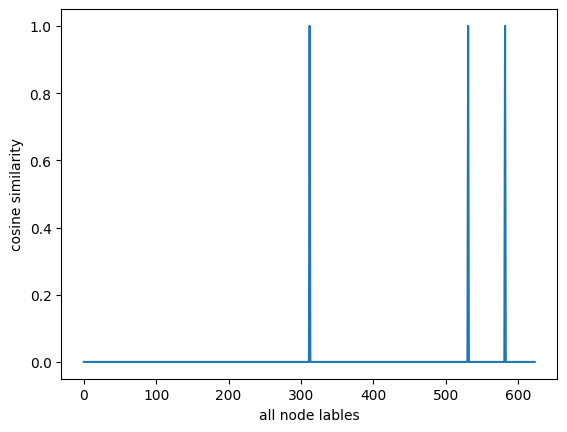

In [143]:
plt.plot(scores_flat)
plt.xlabel("all node lables")
plt.ylabel("cosine similarity")

In [144]:
# scores is an array of probability numbers for each word. I like to have an array of labels that is corespond to any word with higher than 0.8% probability
# Get the shape of the scores matrix
num_words, num_labels = scores.shape
print(num_words, num_labels)

high_score_words = [] # this will be a matrix

for i in range(num_words):
    is_it_over_trashold = scores[i].sum() > TRASHOLD
    if is_it_over_trashold:
        high_score_words.append(scores[i])

print(high_score_words)

# now loop over the "high_score_words" and find all the labesl based on the probability array values, where the probablility is higher then the trashold
high_score_labels = []

for i in range(len(high_score_words)):
    for j in range(len(high_score_words[i])):
        if high_score_words[i][j] > TRASHOLD:
            high_score_labels.append(all_unique_lables[j]) # select the label based on the position in array

print(high_score_labels)


12 52
[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])]
['sale', 'current', 'year']


In [145]:
# from lables -> from there find the right node names for the lable

all_posible_nodes = []

for node in nodes:
    labels = node["labels"]
    if any(item in labels for item in high_score_labels):
        all_posible_nodes.append(node["name"])

print(all_posible_nodes)

['P2', 'Y26']
